In [4]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from math import factorial, sqrt, pi
np.random.seed(42)

Binomial theoretical mean, var: 4.0 2.4
Poisson theoretical mean,var: 3.0 3.0


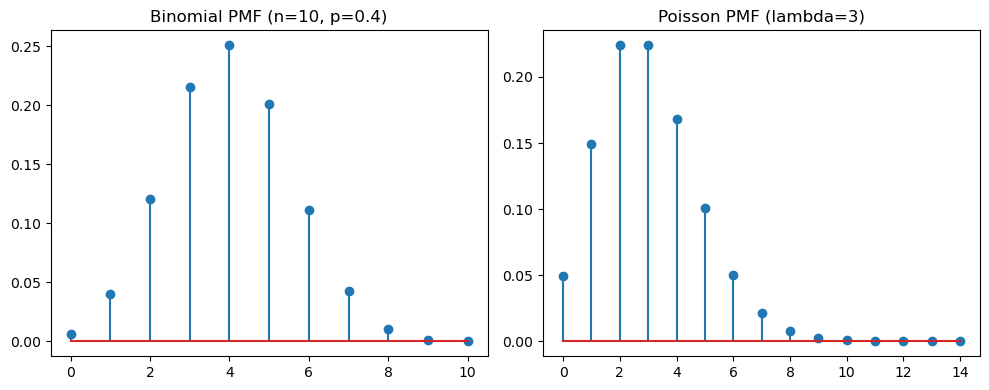

In [5]:
# Binomial example (n, p)
n, p = 10, 0.4
k = np.arange(0, n+1)
pmf_binom = stats.binom.pmf(k, n, p)

print('Binomial theoretical mean, var:', stats.binom.mean(n, p), stats.binom.var(n, p))

# Poisson example
lam = 3.0
k_p = np.arange(0, 15)
pmf_pois = stats.poisson.pmf(k_p, lam)
print('Poisson theoretical mean,var:', stats.poisson.mean(lam), stats.poisson.var(lam))

# Plot PMFs
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].stem(k, pmf_binom)
ax[0].set_title('Binomial PMF (n=10, p=0.4)')
ax[1].stem(k_p, pmf_pois)
ax[1].set_title('Poisson PMF (lambda=3)')
plt.tight_layout()
plt.show()

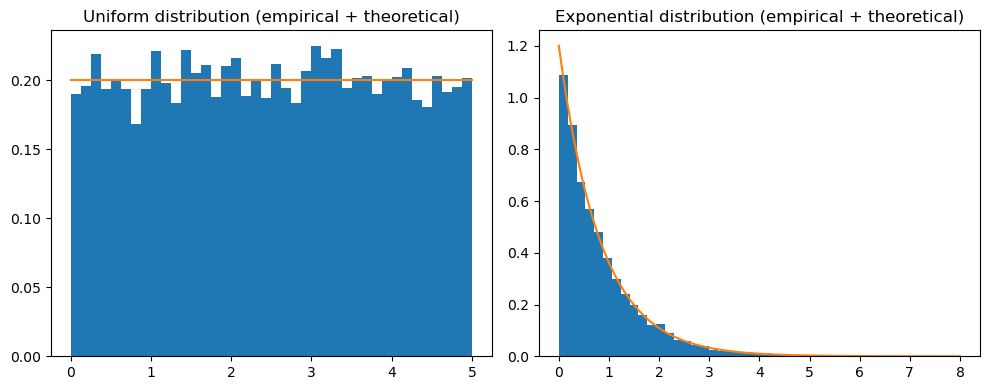

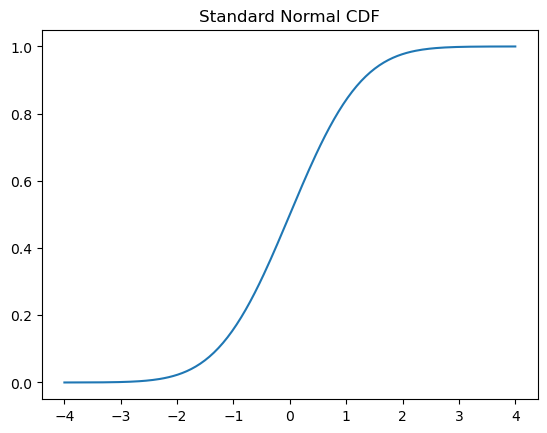

In [7]:
# Uniform(a,b)
a, b = 0, 5
uni_samps = np.random.uniform(a, b, size=10000)
x = np.linspace(a, b, 200)
# Exponential
lam = 1.2
exp_samps = np.random.exponential(1/lam, size=10000)
x_exp = np.linspace(0, 8, 200)

fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].hist(uni_samps, bins=40, density=True)
ax[0].plot(x, stats.uniform.pdf(x, a, b-a))
ax[0].set_title('Uniform distribution (empirical + theoretical)')

ax[1].hist(exp_samps, bins=40, density=True)
ax[1].plot(x_exp, stats.expon.pdf(x_exp, scale=1/lam))
ax[1].set_title('Exponential distribution (empirical + theoretical)')
plt.tight_layout()
plt.show()

# Normal shown previously; we can show standard normal CDF example
xs = np.linspace(-4,4,200)
plt.plot(xs, stats.norm.cdf(xs))
plt.title('Standard Normal CDF')
plt.show()

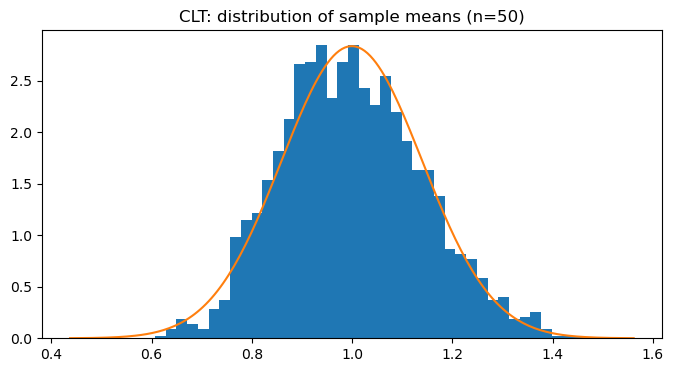

Sample means mean: 0.9996127345506628 std: 0.14058522648880425


In [8]:
# CLT demonstration
pop = np.random.exponential(scale=1.0, size=200000)  # population (skewed)
sample_size = 50
n_trials = 2000
means = [np.mean(np.random.choice(pop, sample_size)) for _ in range(n_trials)]

plt.figure(figsize=(8,4))
plt.hist(means, bins=40, density=True)
# overlay normal with same mean and variance
mu_hat = np.mean(means)
sigma_hat = np.std(means)
x = np.linspace(mu_hat-4*sigma_hat, mu_hat+4*sigma_hat, 200)
plt.plot(x, stats.norm.pdf(x, mu_hat, sigma_hat))
plt.title(f'CLT: distribution of sample means (n={sample_size})')
plt.show()

print('Sample means mean:', mu_hat, 'std:', sigma_hat)